# 3rd Assigment: Pneumonia Chest X-ray 

Data: https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray/downloads/All.zip

This zip file contains 5856 Chest X-Ray images as jpeg format and a CSV file(GTruth.csv). The CSV file contains ground truth information for images."0" means Pneumonia case and "1" means normal case.

The assigment has two parts:

+ Developing a CNN model to classify X-ray images with high accuracy.
+ To explore classifier explanation methods.

In [ ]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import tensorflow.keras
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split



In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Download the data in a directory called `All`.

In [ ]:
df=pd.read_csv('My Drive/All/GTruth.csv')
df.head()

,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


In [ ]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))
#kv_dict

In [ ]:
#Reading Image data and converting it into pixels and separating class labels
Data=[]
Label=[]
directory='My Drive/All'

for filename in os.listdir(directory) :
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue    

In [ ]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(Label), test_size=0.2, random_state=42,stratify=Label)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [ ]:
img_width=224
img_height=224

from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
    
del Data

Using TensorFlow backend.


## Exercise 1

+ Design and train a convolutional neural network for classifying X-ray images. 
+ Report the final (train and test) accuracy of your model.
+ Plot the confusion matrix.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 32))
model.add(Dense(activation = 'sigmoid', units = 1))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Train on 3747 samples, validate on 937 samples
Epoch 1/15
3747/3747 [==============================] - 13s 3ms/step - loss: 0.5925 - acc: 0.7214 - val_loss: 0.4724 - val_acc: 0.7396
Epoch 2/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.3095 - acc: 0.8639 - val_loss: 0.4056 - val_acc: 0.8090
Epoch 3/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.2092 - acc: 0.9165 - val_loss: 0.1755 - val_acc: 0.9328
Epoch 4/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.1610 - acc: 0.9335 - val_loss: 0.1421 - val_acc: 0.9477
Epoch 5/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.1509 - acc: 0.9405 - val_loss: 0.1301 - val_acc: 0.9477
Epoch 6/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.1445 - acc: 0.9474 - val_loss: 0.1250 - val_acc: 0.9552
Epoch 7/15
3747/3747 [==============================] - 6s 2ms/step - loss: 0.1410 - acc: 0.9453 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


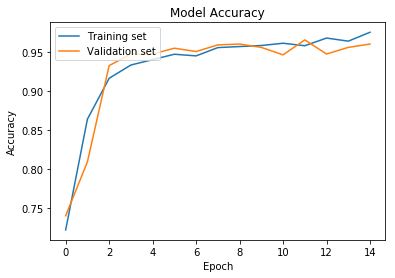

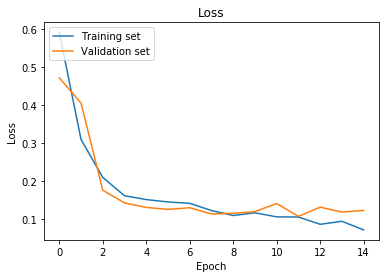

In [ ]:
import matplotlib.pyplot as plt
import numpy

#Accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### The Accuracy of the Model


In [ ]:
X_predicted = model.predict(X_test)
score, acc = model.evaluate(X_test, y_test)

print(score, acc)

235/235 [==============================] - 0s 748us/step
0.1136578082404238 0.9617021276595744


### Confusion Matrix

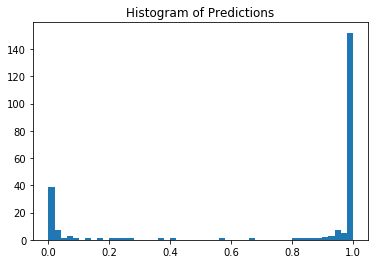

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_predicted, bins=50)
plt.title("Histogram of Predictions")
plt.show()

In [ ]:
#Rounding the predictions - anything above 0.5 means that the pneumonia was detected

newx = []

for x in X_predicted:
  if x > 0.5:
    newx.append(1)
  else:
    newx.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = newx

confusion_matrix(y_true, y_pred)

array([[ 57,   7],
       [  2, 169]])

#### Coonfusion matrix shows that there were only 2 false negatives(patient had pneumonia, but it wasn't detected) and 7 false positives(patient didn't have pneumonia, but it was detected). In medical situations the false negative rate is the most importnat one and should be aimed to be 0, however by decresing this number the false positives rate will increase. 

## Exercise 2

SHAP (SHapley Additive exPlanations) (https://github.com/slundberg/shap) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

Some of the methods implemented in SHAP are designed to explain image classifications. Apply these methods to your model and make a critical review of their results.

In [ ]:
# your code here
!pip install shap 
import shap

In [ ]:
import shap
import numpy as np

# selecting a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explaining predictions of the model on  images
expl = shap.DeepExplainer(model, background)

#e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = expl.shap_values(X_test[1:10])

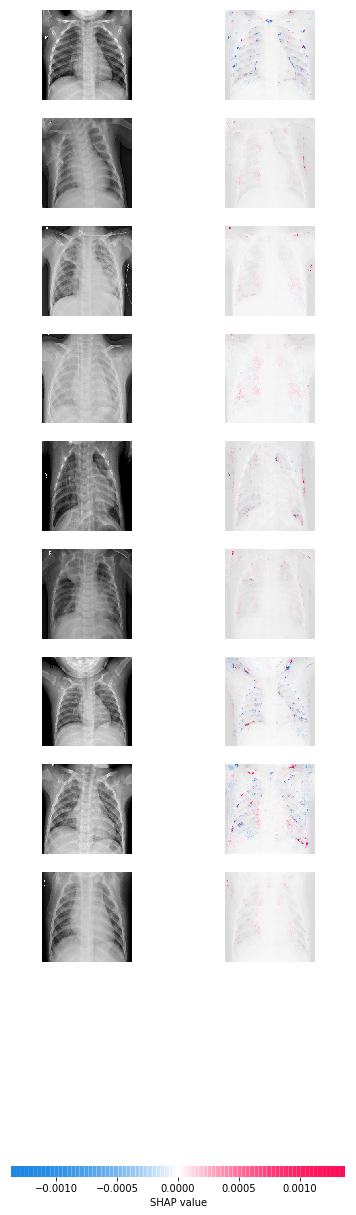

In [ ]:
shap.image_plot(shap_values, X_test[1:10])

#### The SHAP Deep Explainer tells you which pixels helped and which didn't help with the classification of the scans. The pink parts of the image helped with classification and the blue parts where the ones that didn't help. We can see that the inside part - where pneunomia is found - is the part that really helped as well as the outside parts of the ribcage (if they are lighter in colour it means that you have pneunomia). The blue parts are the ones that are almost the same for alll images - parts of health lungs, ribs/bones and surrounding areas. These results agree with how pneunomia is classified by doctors as well. 